#### Imports

In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from config import FEATURES_USED_BY_CLASSIFIER
import numpy as np
import matplotlib.pyplot as plt
import math

#### Daten einlesen

In [48]:
df = pd.read_csv('output_isDigit.csv')
df = df[df['stopwords_removed'] == True]
df = df[df['author'] != 'ALL']
df = df[df['fixed_token_count'] == df['fixed_token_count'].max()]
# df = df[df['language'] == 'de']

# Filter für Features, die in Klassifizierung mit einbezogen werden
features = FEATURES_USED_BY_CLASSIFIER


X = df[features]
y = df['author']

print(df)

        author         title language  token_list_length  node_count  \
126     Austen          Anna       de              13062        3089   
127     Austen     Mansfield       de              13062        3518   
128      Hesse   Steppenwolf       de              13062        4554   
129      Hesse    Siddhartha       en              13062        2298   
130      Hesse        Demian       de              13062        3685   
131  Nietzsche      Jenseits       de              13062        4195   
132      Hesse        Demian       en              13062        2818   
133  Nietzsche       Goetzen       de              13062        4076   
134      Kafka       Amerika       en              13062        2743   
135      Kafka       Schloss       en              13062        2354   
136     Austen      Verstand       en              13062        2380   
137      Hesse   Steppenwolf       en              13062        3549   
138  Nietzsche   Zarathustra       en              13062        

#### Erstellen des Entscheidungsbaums und trainieren

In [49]:
# Je Split teilen wir die Daten auf
split_count = 4
n_repeats = 100


cv = RepeatedStratifiedKFold(n_splits=split_count, n_repeats=n_repeats, random_state=42)


decision_tree = DecisionTreeClassifier()
nn_classificator = KNeighborsClassifier(n_neighbors=5)

accuracy_scores = cross_val_score(nn_classificator, X, y, cv=cv)

print(accuracy_scores)

[0.44444444 0.55555556 0.5        0.375      0.22222222 0.66666667
 0.75       0.375      0.66666667 0.55555556 0.25       0.5
 0.55555556 0.66666667 0.5        0.75       0.44444444 0.44444444
 0.75       0.625      0.44444444 0.33333333 0.625      0.375
 0.66666667 0.44444444 0.5        0.375      0.44444444 0.44444444
 0.5        0.375      0.33333333 0.66666667 0.375      0.5
 0.44444444 0.55555556 0.5        0.5        0.44444444 0.66666667
 0.625      0.5        0.44444444 0.55555556 0.75       0.625
 0.66666667 0.66666667 0.5        0.375      0.33333333 0.66666667
 0.5        0.375      0.44444444 0.55555556 0.25       0.625
 0.55555556 0.66666667 0.375      0.5        0.66666667 0.44444444
 0.375      0.5        0.88888889 0.33333333 0.625      0.5
 0.66666667 0.55555556 0.625      0.375      0.33333333 0.33333333
 0.625      0.5        0.44444444 0.55555556 0.5        0.375
 0.55555556 0.44444444 0.625      0.375      0.77777778 0.33333333
 0.5        0.5        0.44444444 0.

#### Anzeige der Ergebnisse

In [50]:
accuracy_mean = np.mean(accuracy_scores)
author_count =  df['author'].unique().shape[0]
runs_total = split_count * n_repeats


print(f'Testdaten-Anteil: {1 / split_count}')
print(f'Unterschiedliche Aufteilungen der Daten: {len(accuracy_scores)}')
print(f'Genauigkeit: ')
print(f'    Durchschnitt: {accuracy_mean}')
print(f'    Minimum: {min(accuracy_scores)}')
print(f'    Maximum: {max(accuracy_scores)}')
print(f'    Standardabweichung: {np.std(accuracy_scores)}')
print(f'    Prozentanteil über Zufall: {(np.where(accuracy_scores > 1 / author_count))[0].shape[0] / runs_total}')
print(f'Insgesamt {len(df)} Einträge im Dataframe.')


Testdaten-Anteil: 0.25
Unterschiedliche Aufteilungen der Daten: 400
Genauigkeit: 
    Durchschnitt: 0.5129513888888888
    Minimum: 0.125
    Maximum: 0.8888888888888888
    Standardabweichung: 0.13106280282791155
    Prozentanteil über Zufall: 0.9625
Insgesamt 34 Einträge im Dataframe.


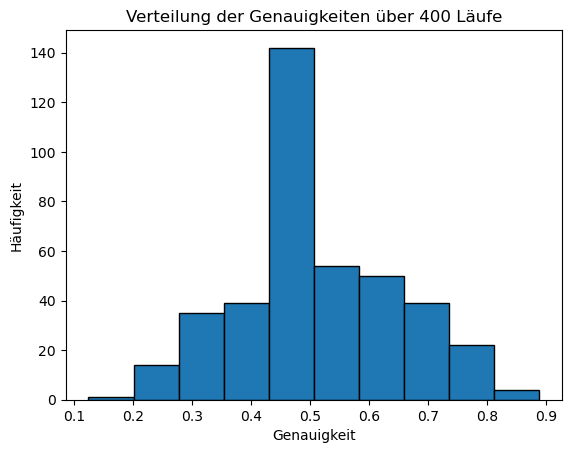

In [51]:
plt.hist(accuracy_scores, bins=10, edgecolor='black')
plt.xlabel('Genauigkeit')
plt.ylabel('Häufigkeit')
plt.title(f'Verteilung der Genauigkeiten über {len(accuracy_scores)} Läufe')
plt.show()

In [52]:
# Für Bestimmung von wichtigsten Attributen müssen wir nicht mehr Daten aufteilen, sondern können den Baum mit allen Daten einfach trainieren
decision_tree.fit(X, y)

# Laut ChatGPT: Berechnet je Feature, wie oft es anteilig im Entscheidungsbaum genutzt wurde, stimmt aber offensichtlich nicht.
# -> Hier könnte man mal in die Dokumentation im Programmcode schauen, in der normalen Dokumentation hab ich dazu nichts gefunden...
importance_list = decision_tree.feature_importances_
for name, imp in sorted(zip(features, importance_list), key=lambda x: x[1], reverse=True):
    print(f'{name}: {imp:.3f}')

print(f'Summe der Wichtigkeiten: {sum(importance_list)}')

edge_count: 0.451
betweenness_standard_deviation: 0.258
average_clustering: 0.122
average_degree: 0.059
betweenness_max: 0.039
powerlaw_xmin_value: 0.039
diameter: 0.031
node_count: 0.000
median_degree: 0.000
average_distance: 0.000
betweenness_average: 0.000
betweenness_min: 0.000
powerlaw_alpha_value: 0.000
Summe der Wichtigkeiten: 1.0


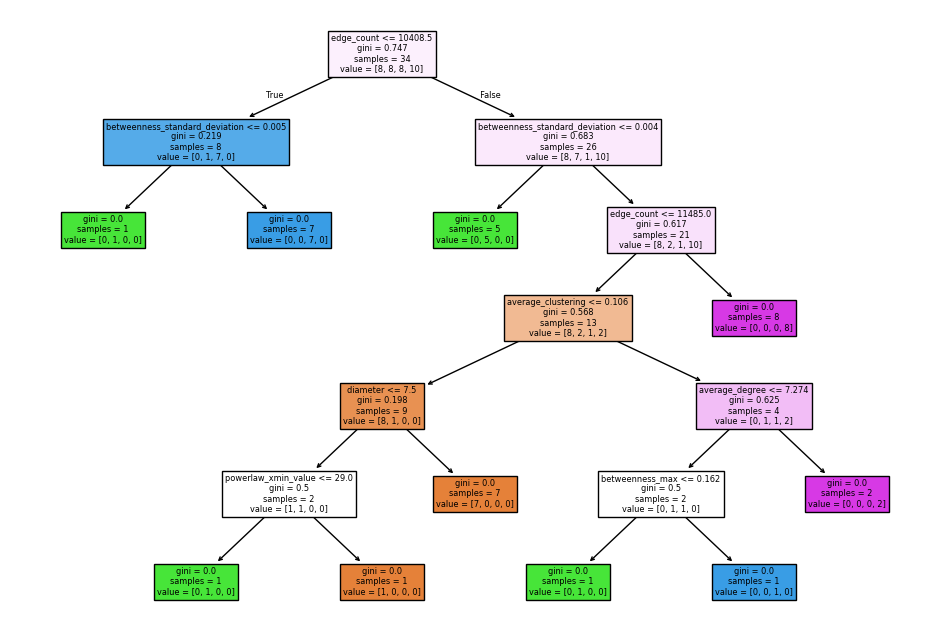

In [53]:
# Darstellung von ChatGPT
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(decision_tree, feature_names=features, filled=True)
plt.show()